In [69]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [82]:
ROOT_DIR = '/Users/p099947-dev/PycharmProjects/Vision/Vision/data/processed/Dataset_v2'
subset = 'val' #"train" or "val"
image_directory = '{}/bottle/{}/'.format(ROOT_DIR,subset)
annotation_file = '{}/instances_{}.json'.format(ROOT_DIR,subset)

In [83]:
example_water_bottle = COCO(annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [84]:
categories = example_water_bottle.loadCats(example_water_bottle.getCatIds())
category_names = [category['name'] for category in categories]
print('Water Bottle categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Water Bottle supercategories: \n{}'.format(' '.join(category_names)))

Water Bottle categories: 
cap bottle label

Water Bottle supercategories: 
water_bottle


In [91]:
category_ids = example_water_bottle.getCatIds(catNms=['bottle'])
image_ids = example_water_bottle.getImgIds(catIds=category_ids)
image_data = example_water_bottle.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [92]:
image_data

{'id': 11,
 'file_name': '0129.png',
 'width': 960,
 'height': 540,
 'date_captured': '2019-06-05 09:13:10.222710',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

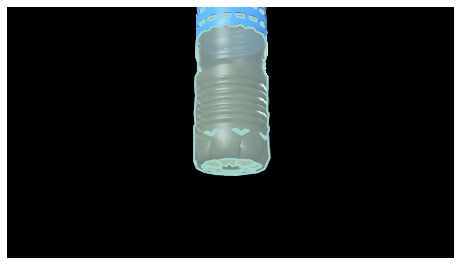

In [93]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_water_bottle.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_water_bottle.loadAnns(annotation_ids)
example_water_bottle.showAnns(annotations)